# Recidivism prediction

## 0. Set-up

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## 1. Exploratory data analysis

In [2]:
df_train=pd.read_csv('../input/beat-compass-retake/train.csv', index_col=0)
df_test= pd.read_csv('../input/beat-compass-retake/test.csv', index_col=0)
df_example = pd.read_csv('../input/beat-compass-retake/example.csv', index_col=0)
pd.set_option('max_columns', None)
df_train.head()

,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,doughnuts_comsumption,recidivism_label
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014-06-25,Male,1987-10-08,28,25 - 45,African-American,0,2,0,0,5,-1.0,2014-06-24 06:22:18,2014-06-27 09:51:57,14004144CF10A,NaN,2014-06-25,0.0,F,arrest case no charge,14002721MM20A,(M1),280.0,2014-09-19,Possess Cannabis/20 Grams Or Less,2015-06-26,2015-10-22,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,2,Low,2014-06-25,Risk of Violence,2,Low,2014-06-25,2014-06-24,2014-06-27,5,2,86,0.458606,1
1,2013-01-07,Male,1981-03-26,35,25 - 45,Caucasian,0,3,0,0,2,0.0,2013-01-07 02:38:57,2013-01-07 09:00:03,13000389MM10A,2013-01-07,NaN,0.0,M,Battery,15007671MM10A,(M2),0.0,2015-07-18,Disorderly Intoxication,2015-07-18,2015-07-18,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2013-01-07,Risk of Violence,4,Low,2013-01-07,2015-07-18,2015-07-18,2,0,922,0.006780,0
2,2013-02-23,Male,1990-01-14,26,25 - 45,African-American,0,10,0,0,7,-1.0,2013-02-22 05:14:38,2013-02-24 02:35:53,13002747CF10A,2013-02-22,NaN,1.0,F,Grand Theft in the 3rd Degree,13023460TC30A,(M2),NaN,2013-03-03,Operating W/O Valid License,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,10,High,2013-02-23,Risk of Violence,8,High,2013-02-23,2013-02-22,2013-02-24,7,1,8,0.439042,1
3,2013-12-22,Female,1972-05-28,43,25 - 45,Caucasian,0,1,0,0,0,0.0,2013-12-22 02:32:05,2013-12-23 01:40:39,13017627CF10A,2013-12-21,NaN,1.0,F,Aggravated Battery / Pregnant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-12-22,Risk of Violence,1,Low,2013-12-22,2013-12-22,2013-12-23,0,1,831,0.257482,0
4,2014-08-07,Female,1991-03-07,25,25 - 45,Caucasian,0,3,0,0,2,-1.0,2014-08-06 12:07:31,2014-08-07 08:49:26,14028826MU10A,2014-08-06,NaN,1.0,M,Unlaw Lic Use/Disply Of Others,15030357TC10A,(M2),NaN,2015-10-23,Driving License Suspended,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-08-07,Risk of Violence,3,Low,2014-08-07,2014-08-06,2014-08-07,2,0,442,1.146142,1


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3695 entries, 0 to 3694
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   compas_screening_date    3695 non-null   object 
 1   sex                      3695 non-null   object 
 2   dob                      3695 non-null   object 
 3   age                      3695 non-null   int64  
 4   age_cat                  3695 non-null   object 
 5   race                     3695 non-null   object 
 6   juv_fel_count            3695 non-null   int64  
 7   decile_score             3695 non-null   int64  
 8   juv_misd_count           3695 non-null   int64  
 9   juv_other_count          3695 non-null   int64  
 10  priors_count             3695 non-null   int64  
 11  days_b_screening_arrest  3695 non-null   float64
 12  c_jail_in                3695 non-null   object 
 13  c_jail_out               3695 non-null   object 
 14  c_case_number           

In [4]:
df_train.describe()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,doughnuts_comsumption,recidivism_label
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,1199.000000,0.0,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000
mean,34.501218,0.062517,4.458728,0.090934,0.109878,3.227876,-1.750203,26.943166,20.311927,NaN,0.112043,4.458728,3.658728,3.227876,13.497700,552.303924,0.454347,0.455480
std,11.703425,0.420945,2.859811,0.477271,0.469823,4.745959,5.059164,304.218012,80.619282,NaN,0.315462,2.859811,2.504174,4.745959,51.025641,401.648208,0.589752,0.498081
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-29.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.975910,0.000000
25%,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,144.000000,-0.036437,0.000000
50%,31.000000,0.000000,4.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,NaN,0.000000,4.000000,3.000000,1.000000,0.000000,536.000000,0.380960,0.000000
75%,42.000000,0.000000,7.000000,0.000000,0.000000,4.000000,-1.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,4.000000,3.000000,913.000000,0.984051,1.000000
max,96.000000,10.000000,10.000000,12.000000,9.000000,38.000000,29.000000,9485.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,748.000000,1186.000000,1.989562,1.000000


From the understanding that each row represents a person who has been in prision, we tried to figure out the meaning of our variables:
- compas_screening_date (Date): Date in which the prisoner enters Compas systems (usually this date is very close to 'c_jail_in').
- sex (Categorical).
- dob (Date): Date of birth.
- age (Numerical).
- age_cat (Categorical): Age range.
- race (Categorical).
- juv_fel_count (Numerical): Nº of felony crimes commited during youth.
- decile_score (Numerical): ? 
- juv_misd_count (Numerical): Nº of misdemeanor crimes commited during youth.
- juv_other_count (Numerical): Nº of crimes commited during youth, other than felonies and misdemeanors.
- prior_count (Numerical): ?
- days_b_screening_arrest (Numerical): Difference, in days, between 'compas_screening_date' and 'c_jail_in'.
- c_jail_in (Date): Date of prision entrance (first time).
- c_jail_out (Date): Date of prision release (first time).
- c_case_number (Categorical): Id of the case (first time).
- c_offense_date (Date): Date in which the crime was committed (first time).
- c_arrest_date (Date): Date of arrest (first time).
- c_charge_degree (Categorical): Type of crime, either F=Felony or M=Misdemeanor (first time).
- c_charge_desc (Categorical): Description of charge (first time).
- r_jail_in (Date): Date of prision entrance (second time).
- r_jail_out (Date): Date of prision release (second time).
- r_case_number (Categorical): Id of the case (second time).
- r_offense_date (Date): Date in which the crime was committed (second time).
- r_arrest_date (Date): Date of arrest (second time).
- r_charge_degree (Categorical): Type of crime, either F=Felony or M=Misdemeanor (second time).
- r_charge_desc (Categorical): Description of charge (second time).
- violent_recid: Non informative, always NaN.
- is_violent_recid (Numerical): In case of having a second record of prision entrance, whether the crime was violent or not.

### 1.1 Cleaning

Set the correct datatypes

In [5]:
time_vars = ['compas_screening_date','dob', 'r_jail_out','r_jail_in', 'r_offense_date','c_jail_out','c_jail_in','c_offense_date','c_arrest_date', 'vr_offense_date','screening_date','v_screening_date','in_custody','out_custody']
target = "recidivism_label"

Adding counting variables for dates

In [6]:
df_train[time_vars] = df_train[time_vars].apply(pd.to_datetime, axis=1)

df_test[time_vars] = df_test[time_vars].apply(pd.to_datetime, axis=1)

We have generated 3 new temporal features based on dates of entering/leaving prison:
- Days in prison (First time): Number of days from entrance date ('c_jail_in') to release date ('c_jail_out').
- Days in prison (Second time): For those who have previous reincidence records (not NaN 'r_jail_in' and 'r_jail_out' values), number of days from the second entrance date ('r_jail_in') to the second release date ('r_jail_out'). For the ones with no register of reincidence, value is 0 days.
- Days since last time in prison: Number of days from last time out of prision (dates c_jail_out, or r_jail_out in case of previous reincidence) to "current" date (last value from 'r_jail_out'variable).

In [7]:
max_date = max(df_train['r_jail_out'])


def days_sl_p(row, date = max_date):
    if row['r_jail_out'] == row['r_jail_out']:
        return (date - row['r_jail_out'])/ np.timedelta64(1, 'D')
    else:
        return (date - row['c_jail_out'])/ np.timedelta64(1, 'D')


df_train['days_since_last'] = df_train.apply(days_sl_p, axis=1)
df_test['days_since_last'] = df_test.apply(days_sl_p, axis=1)

def days_first(row):
    return (row['c_jail_out'] - row['c_jail_in'])/ np.timedelta64(1, 'D')

def days_second(row):
    if row['r_jail_out'] == row['r_jail_out']:
        return (row['r_jail_out'] - row['r_jail_in'])/np.timedelta64(1, 'D') 
    else:
        return 0

df_train['days_in_jail_1st'] = df_train.apply(days_first, axis=1)
df_test['days_in_jail_1st'] = df_test.apply(days_first, axis=1)

df_train['days_in_jail_2nd'] = df_train.apply(days_second, axis=1)
df_test['days_in_jail_2nd'] = df_test.apply(days_second, axis=1)

Inspect NANs

In [8]:
df_train.isnull().sum()

compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest       0
c_jail_in                     0
c_jail_out                    0
c_case_number                 0
c_offense_date              444
c_arrest_date              3251
c_days_from_compas            0
c_charge_degree               0
c_charge_desc                 1
r_case_number              1893
r_charge_degree            1893
r_days_from_arrest         2496
r_offense_date             1893
r_charge_desc              1925
r_jail_in                  2496
r_jail_out                 2496
violent_recid              3695
is_violent_recid              0
vr_case_number             3281
vr_charge_degree           3281
vr_offen

* ```c_arrest_date``` and ```c_offense_date``` are complementary: there is a nat where there is a value and viceversa --> Create a boolean.
* replace single nan in ```c_charge_desc```
* all nans in ```violent_recid``` --> drop
* dropped columns starting with r_ or vr_ and re-created is_recid by inspecting nans


In [9]:
try:
    df_train['c_is_offense'] = df_train.c_offense_date.isnull()
    df_test['c_is_offense'] = df_test.c_offense_date.isnull()
    df_train.drop(['c_arrest_date', 'c_offense_date'], inplace =True, axis=1)
    df_test.drop(['c_arrest_date', 'c_offense_date'], inplace =True, axis = 1)
except:
    pass
df_train.c_charge_desc = df_train.c_charge_desc.fillna("unknown")
df_test.c_charge_desc = df_test.c_charge_desc.fillna("unknown")
try:
    df_train.drop(['violent_recid'], inplace =True, axis=1)
    df_test.drop(['violent_recid'], inplace =True, axis = 1)
except:
    pass
try:
    df_train['r_is_recid'] = df_train.r_case_number.isnull()
    df_test['r_is_recid'] = df_test.r_case_number.isnull()
    df_train.drop(['r_case_number', 'r_charge_degree','r_days_from_arrest','r_offense_date','r_charge_desc','r_jail_in','r_jail_out'], inplace =True, axis=1)
    df_test.drop(['r_case_number', 'r_charge_degree','r_days_from_arrest','r_offense_date','r_charge_desc','r_jail_in','r_jail_out'], inplace =True, axis = 1)
except:
    pass
try:
    df_train.drop(['vr_case_number', 'vr_charge_degree','vr_offense_date','vr_charge_desc'], inplace =True, axis=1)
    df_test.drop(['vr_case_number', 'vr_charge_degree','vr_offense_date','vr_charge_desc'], inplace =True, axis = 1)
except:
    pass

In [10]:
df_train.isnull().sum()

compas_screening_date      0
sex                        0
dob                        0
age                        0
age_cat                    0
race                       0
juv_fel_count              0
decile_score               0
juv_misd_count             0
juv_other_count            0
priors_count               0
days_b_screening_arrest    0
c_jail_in                  0
c_jail_out                 0
c_case_number              0
c_days_from_compas         0
c_charge_degree            0
c_charge_desc              0
is_violent_recid           0
type_of_assessment         0
decile_score.1             0
score_text                 0
screening_date             0
v_type_of_assessment       0
v_decile_score             0
v_score_text               0
v_screening_date           0
in_custody                 0
out_custody                0
priors_count.1             0
start                      0
end                        0
doughnuts_comsumption      0
recidivism_label           0
days_since_las

### 1.2 Feature selection

First, we do not need three variables for age: "dob", "age", "age_cat"

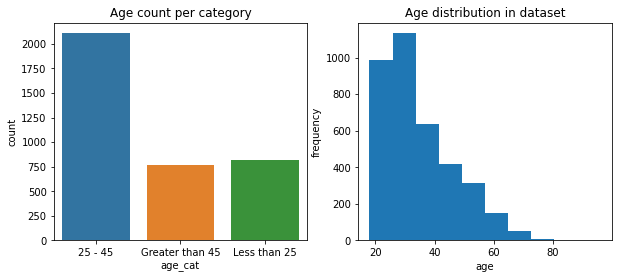

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].set_title("Age count per category")
sns.countplot(x = df_train.age_cat, ax = ax[0])
ax[1].hist(df_train.age)
ax[1].set_title("Age distribution in dataset")
ax[1].set_xlabel("age")
ax[1].set_ylabel("frequency")
plt.show()

Let's conserve only the age

In [12]:
df_train.drop(columns =["dob", "age_cat"], inplace=True)
df_train

,compas_screening_date,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_days_from_compas,c_charge_degree,c_charge_desc,is_violent_recid,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,doughnuts_comsumption,recidivism_label,days_since_last,days_in_jail_1st,days_in_jail_2nd,c_is_offense,r_is_recid
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014-06-25,Male,28,African-American,0,2,0,0,5,-1.0,2014-06-24 06:22:18,2014-06-27 09:51:57,14004144CF10A,0.0,F,arrest case no charge,0,Risk of Recidivism,2,Low,2014-06-25,Risk of Violence,2,Low,2014-06-25,2014-06-24,2014-06-27,5,2,86,0.458606,1,180.000000,3.145590,118.0,True,False
1,2013-01-07,Male,35,Caucasian,0,3,0,0,2,0.0,2013-01-07 02:38:57,2013-01-07 09:00:03,13000389MM10A,0.0,M,Battery,0,Risk of Recidivism,3,Low,2013-01-07,Risk of Violence,4,Low,2013-01-07,2015-07-18,2015-07-18,2,0,922,0.006780,0,276.000000,0.264653,0.0,False,False
2,2013-02-23,Male,26,African-American,0,10,0,0,7,-1.0,2013-02-22 05:14:38,2013-02-24 02:35:53,13002747CF10A,1.0,F,Grand Theft in the 3rd Degree,0,Risk of Recidivism,10,High,2013-02-23,Risk of Violence,8,High,2013-02-23,2013-02-22,2013-02-24,7,1,8,0.439042,1,1149.891748,1.889757,0.0,False,False
3,2013-12-22,Female,43,Caucasian,0,1,0,0,0,0.0,2013-12-22 02:32:05,2013-12-23 01:40:39,13017627CF10A,1.0,F,Aggravated Battery / Pregnant,0,Risk of Recidivism,1,Low,2013-12-22,Risk of Violence,1,Low,2013-12-22,2013-12-22,2013-12-23,0,1,831,0.257482,0,847.930104,0.964282,0.0,False,True
4,2014-08-07,Female,25,Caucasian,0,3,0,0,2,-1.0,2014-08-06 12:07:31,2014-08-07 08:49:26,14028826MU10A,1.0,M,Unlaw Lic Use/Disply Of Others,0,Risk of Recidivism,3,Low,2014-08-07,Risk of Violence,3,Low,2014-08-07,2014-08-06,2014-08-07,2,0,442,1.146142,1,620.632338,0.862442,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,2013-06-03,Male,33,African-American,0,9,0,0,16,-2.0,2013-06-01 11:00:47,2013-06-02 08:14:30,13007802CF10A,2.0,F,Driving While License Revoked,0,Risk of Recidivism,9,High,2013-06-03,Risk of Violence,3,Low,2013-06-03,2014-03-24,2014-03-29,16,0,294,0.684027,1,752.000000,0.884525,5.0,False,False
3691,2013-10-15,Male,27,African-American,0,7,0,0,6,0.0,2013-10-15 07:16:22,2013-10-17 05:27:21,13014424CF10A,0.0,F,Fabricating Physical Evidence,0,Risk of Recidivism,7,Medium,2013-10-15,Risk of Violence,6,Medium,2013-10-15,2013-11-14,2013-11-15,6,2,30,1.081915,1,797.000000,1.924294,0.0,False,False
3692,2014-07-20,Male,50,Hispanic,0,1,0,0,5,-1.0,2014-07-19 05:07:48,2014-07-23 03:00:15,14009885CF10A,1.0,F,Felony Driving While Lic Suspd,1,Risk of Recidivism,1,Low,2014-07-20,Risk of Violence,1,Low,2014-07-20,2014-11-23,2014-11-24,5,3,126,1.096130,1,512.000000,3.911424,1.0,False,False


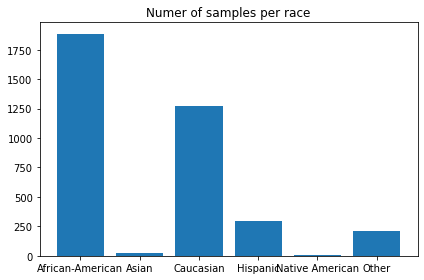

In [13]:
counts = df_train.groupby("race").count()["recidivism_label"]

plt.bar(counts.index, counts)
plt.title("Numer of samples per race")
plt.tight_layout()

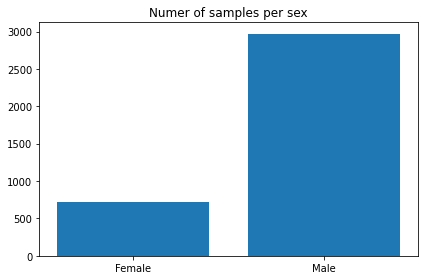

In [14]:
counts = df_train.groupby("sex").count()["recidivism_label"]

plt.bar(counts.index,counts)
plt.title("Numer of samples per sex")
plt.tight_layout()

In [15]:
y_train = df_train[target]

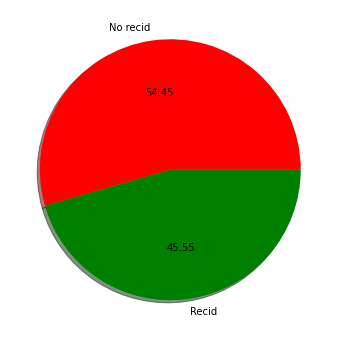

In [16]:
plt.pie(np.c_[len(y_train)-np.sum(y_train),np.sum(y_train)][0],labels=['No recid','Recid'],colors=['r','g'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

The two categories of the target feature are balanced.

Drop variables that are useless for our ML task

In [17]:
to_drop = ['compas_screening_date','c_jail_in','c_jail_out','c_case_number','c_charge_desc','type_of_assessment','screening_date','v_type_of_assessment','v_screening_date','in_custody','out_custody', 'doughnuts_comsumption']
try:
    df_train.drop(to_drop, inplace =True, axis=1)
    df_test.drop(to_drop, inplace =True, axis = 1)
except:
    pass

One hot encoding for categorical variables

In [18]:
df_train.head()

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,is_violent_recid,decile_score.1,score_text,v_decile_score,v_score_text,priors_count.1,start,end,recidivism_label,days_since_last,days_in_jail_1st,days_in_jail_2nd,c_is_offense,r_is_recid
Id,,,,,,,,,,,,,,,,,,,,,,,,,
0,Male,28,African-American,0,2,0,0,5,-1.0,0.0,F,0,2,Low,2,Low,5,2,86,1,180.000000,3.145590,118.0,True,False
1,Male,35,Caucasian,0,3,0,0,2,0.0,0.0,M,0,3,Low,4,Low,2,0,922,0,276.000000,0.264653,0.0,False,False
2,Male,26,African-American,0,10,0,0,7,-1.0,1.0,F,0,10,High,8,High,7,1,8,1,1149.891748,1.889757,0.0,False,False
3,Female,43,Caucasian,0,1,0,0,0,0.0,1.0,F,0,1,Low,1,Low,0,1,831,0,847.930104,0.964282,0.0,False,True
4,Female,25,Caucasian,0,3,0,0,2,-1.0,1.0,M,0,3,Low,3,Low,2,0,442,1,620.632338,0.862442,0.0,False,False


In [19]:
categorical_vars = ['sex', 'race','c_charge_degree','score_text', 'v_score_text','c_is_offense','r_is_recid']
df_train[categorical_vars] = df_train[categorical_vars].astype("category")
df_test[categorical_vars] = df_test[categorical_vars].astype("category")


In [20]:
one_hot = pd.get_dummies(df_train[categorical_vars], drop_first=True)
df_train[one_hot.columns]=one_hot

In [21]:
one_hot = pd.get_dummies(df_test[categorical_vars], drop_first=True)
df_test[one_hot.columns]=one_hot

In [22]:
try:
    df_train.drop(categorical_vars, axis=1, inplace=True)
except:
    pass

In [23]:
try:
    df_test.drop(categorical_vars, axis=1, inplace=True)
except:
    pass

The features we have selected leave us with the following correlation matrix:

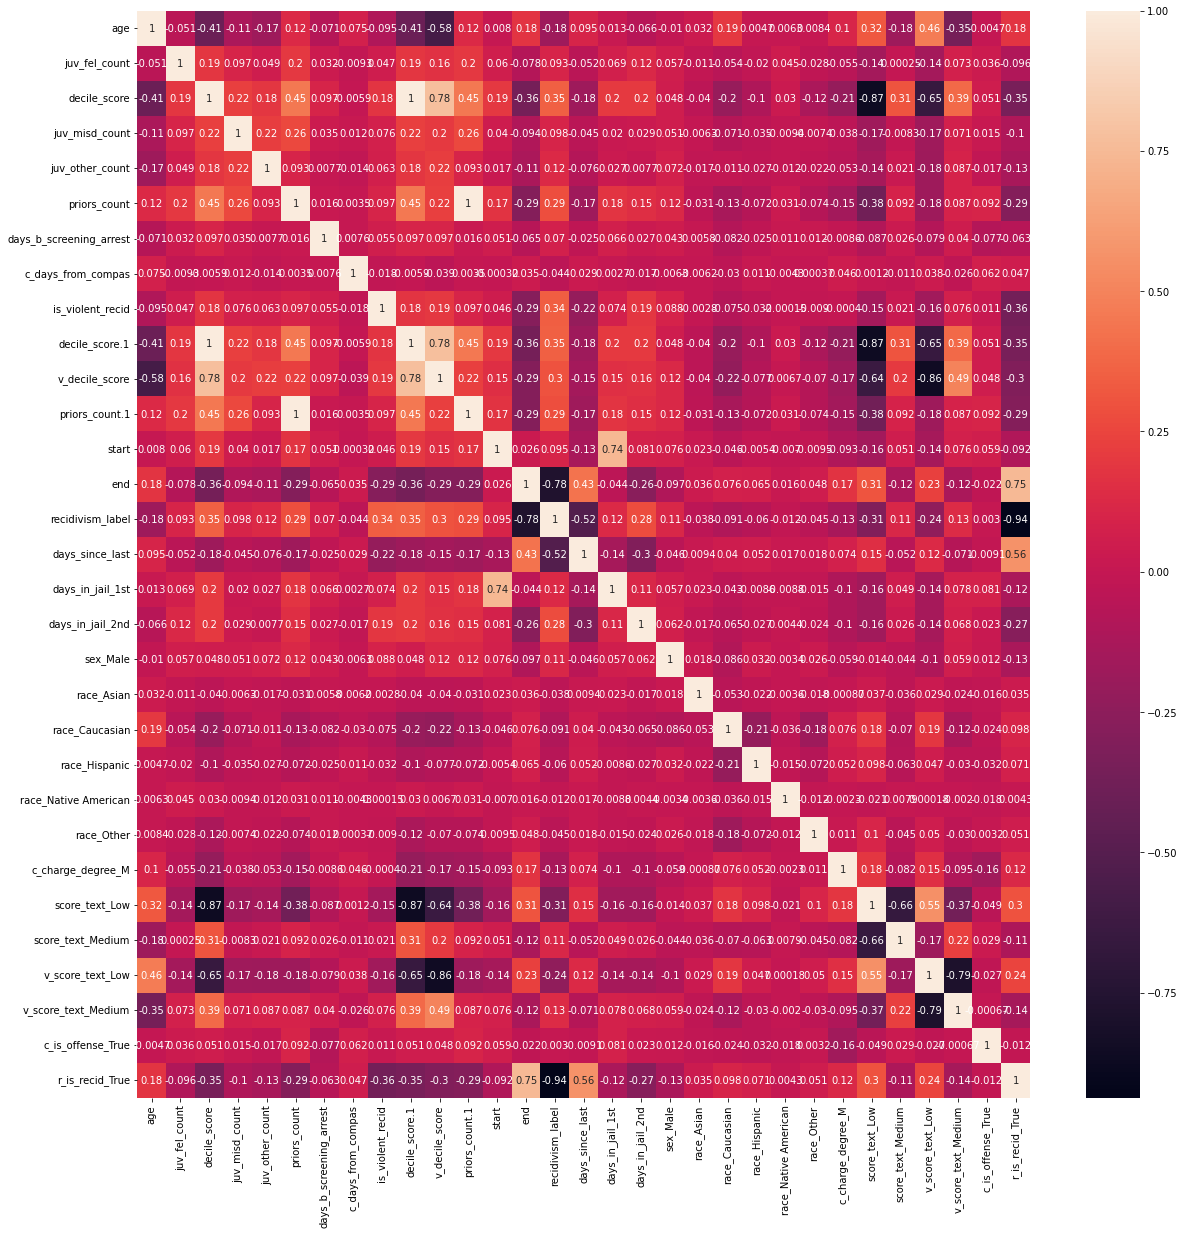

In [24]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
sns.heatmap(df_train.corr(),ax = ax, annot=True)
plt.show()

### 1.3 Normalization

In [25]:
features = df_train.columns.tolist()
features.remove(target)
features 

['age',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_days_from_compas',
 'is_violent_recid',
 'decile_score.1',
 'v_decile_score',
 'priors_count.1',
 'start',
 'end',
 'days_since_last',
 'days_in_jail_1st',
 'days_in_jail_2nd',
 'sex_Male',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Native American',
 'race_Other',
 'c_charge_degree_M',
 'score_text_Low',
 'score_text_Medium',
 'v_score_text_Low',
 'v_score_text_Medium',
 'c_is_offense_True',
 'r_is_recid_True']

In [26]:
df_train.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,recidivism_label,days_since_last,days_in_jail_1st,days_in_jail_2nd,sex_Male,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_M,score_text_Low,score_text_Medium,v_score_text_Low,v_score_text_Medium,c_is_offense_True,r_is_recid_True
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,28,0,2,0,0,5,-1.0,0.0,0,2,2,5,2,86,1,180.000000,3.145590,118.0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,35,0,3,0,0,2,0.0,0.0,0,3,4,2,0,922,0,276.000000,0.264653,0.0,1,0,1,0,0,0,1,1,0,1,0,0,0
2,26,0,10,0,0,7,-1.0,1.0,0,10,8,7,1,8,1,1149.891748,1.889757,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,43,0,1,0,0,0,0.0,1.0,0,1,1,0,1,831,0,847.930104,0.964282,0.0,0,0,1,0,0,0,0,1,0,1,0,0,1
4,25,0,3,0,0,2,-1.0,1.0,0,3,3,2,0,442,1,620.632338,0.862442,0.0,0,0,1,0,0,0,1,1,0,1,0,0,0


In [27]:
X_train = df_train[features].values
y_train = df_train[target].values
X_test = df_test[features].values

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

## 2. Modeling

Let's do a grid search among some well known models to choose model and parameters that give us the best accuracy.

In [29]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# List of names of models
model_names = ['SVM', 'KNeighbors', 'Decision Tree', 'Random Forest', 'MLP', 'Gaussian Process', 'Gaussian Naive Bayes', 'Quadratic Discriminant Analysis']

# Instantiation of models
models = [SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier(max_iter=100), GaussianProcessClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis()]

# List of parameters for each model in the grid search
params_svc = {'kernel': ('linear', 'rbf'),
              'C': [1, 10, 100]}
params_nn = {'n_neighbors':[3,5,7,9,11,19], 'weights':['uniform','distance'], 'metric':['euclidean','manhattan'] }
params_dtree = {'criterion': ['entropy', 'gini'], 'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
params_rforest = { 
    'n_estimators': [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}
params_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
params_gpc = {'kernel': [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]}
params_gpc = {'kernel': [1*DotProduct()]}
params_nb= {}
params_qda = {}

params = [params_svc,params_nn, params_dtree, params_rforest, params_mlp,params_gpc, params_nb, params_qda]

We implement crossvalidation within the gridsearch, with K=10 folds.

In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
import pandas as pd

best_scores = {}
best_params = {}
for model,name,param in zip(models, model_names, params):
    print("Grid search for "+name)
    sh = GridSearchCV(model, param, cv=10, verbose =True, n_jobs=8).fit(X_scaled_train, y_train)
    best_scores[name]= sh.best_score_
    best_params[name]= sh.best_params_

Grid search for SVM
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:   14.8s finished


Grid search for KNeighbors
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed:    9.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Grid search for Decision Tree
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Grid search for Random Forest
Fitting 10 folds for each of 798 candidates, totalling 7980 fits


[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 410 tasks      | elapsed:   19.7s
[Parallel(n_jobs=8)]: Done 666 tasks      | elapsed:   31.9s
[Parallel(n_jobs=8)]: Done 1016 tasks      | elapsed:   53.4s
[Parallel(n_jobs=8)]: Done 1466 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 2016 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 2666 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 3416 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 4266 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 5216 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Done 6266 tasks      | elapsed:  6.7min
[Parallel(n_jobs=8)]: Done 7416 tasks      | elapsed:  8.2min
[Parallel(n_jobs=8)]: Done 7980 out of 7980 | elapsed:  8.9min finished


Grid search for MLP
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   55.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.4min
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural

Grid search for Gaussian Process
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed: 13.2min remaining:  8.8min
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed: 16.7min finished
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: Converg

Grid search for Gaussian Naive Bayes
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.2s finished


Grid search for Quadratic Discriminant Analysis
Fitting 10 folds for each of 1 candidates, totalling 10 fits


/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [31]:
best_scores

{'SVM': 0.9834886105617814,
 'KNeighbors': 0.9694140481945359,
 'Decision Tree': 0.9899875485241341,
 'Random Forest': 0.9899875485241341,
 'MLP': 0.98213725921043,
 'Gaussian Process': 0.9845718889621329,
 'Gaussian Naive Bayes': 0.9669779535633195,
 'Quadratic Discriminant Analysis': 0.9588522669010473}

In [32]:
best_params

{'SVM': {'C': 10, 'kernel': 'linear'},
 'KNeighbors': {'metric': 'manhattan',
  'n_neighbors': 11,
  'weights': 'distance'},
 'Decision Tree': {'criterion': 'gini', 'max_depth': 4},
 'Random Forest': {'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'auto',
  'n_estimators': 500},
 'MLP': {'activation': 'tanh',
  'alpha': 0.0001,
  'hidden_layer_sizes': (50, 100, 50),
  'learning_rate': 'constant',
  'solver': 'sgd'},
 'Gaussian Process': {'kernel': 1**2 * DotProduct(sigma_0=1)},
 'Gaussian Naive Bayes': {},
 'Quadratic Discriminant Analysis': {}}

Therefore we chose a Random Forest with ...

In [33]:
model = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=500)
model = model.fit(X_scaled_train, y_train)
yhat = model.predict(X_scaled_test)
yhat

array([1, 0, 1, ..., 1, 0, 0])

In [34]:
assert len(yhat) == 2464

In [35]:
df_yhat = pd.DataFrame()
df_yhat['Id']=range(len(yhat))
df_yhat['Category']=yhat
#df_yhat.to_csv('sub_1_10102021.csv', index=False)